# Bellabeat: How Can A Wellness Technology Company Play It Smart?

## STEP 1: ASK

**Background**
Bellabeat is a high-tech manufacturer of beautifully-designed health-focused smart products for women since 2013. Inspiring and empowering women with knowledge about their own health and habits, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for females.

The co-founder and Chief Creative Officer, Urška Sršen is confident that an analysis of non-Bellebeat consumer data (ie. FitBit fitness tracker usage data) would reveal more opportunities for growth. 

**Business Task**
Analyze FitBit Fitness Tracker Data to gain insights into how consumers are using the FitBit app and discover trends and insights for Bellabeat marketing strategy.

**Business Objectives:**

* What are the trends identified?
* How could these trends apply to Bellabeat customers?
* How could these trends help influence Bellabeat marketing strategy?

**Key Stakeholders:**
* Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
* Sando Mur: Mathematician, Bellabeat’s cofounder and key member of the Bellabeat executive team
* Bellabeat marketing analytics team: A team of data analysts guiding Bellabeat's marketing strategy.

## STEP 2: PREPARE

**Information on Data Source:**<br>
The data is publicly available on Kaggle: FitBit Fitness Tracker Data and stored in 18 csv files.
Generated by respondents from a distributed survey via Amazon Mechanical Turk between 12 March 2016 to 12 May 2016.
30 FitBit users who consented to the submission of personal tracker data.
Data collected includes:<br>
(1) physical activity recorded in minutes, <br>
(2) heart rate, <br>
(3) sleep monitoring,<br> 
(4) daily activity and <br>
(5) steps.<br>

**Limitations of Data Set:**<br>
Data collected from year 2016. Users' daily activity, fitness and sleeping habits, <br>diet and food consumption may have changed since then, hence data may not be timely or relevant.
<br><br>
Sample size of 30 female FitBit users is not representative of the entire female population.
As data is collected in a survey, hence unable to ascertain the integrity or accuracy of data.

**Is Data ROCCC?**<br>
A good data source is ROCCC which stands for Reliable, Original, Comprehensive, Current, and Cited.<br>

1) Reliable - LOW - Not reliable as it only has 30 respondents<br>
2) Original - LOW - Third party provider (Amazon Mechanical Turk)<br>
3) Comprehensive - MED - Parameters match most of Bellabeat's products' parameters<br>
4) Current - LOW - Data is 5 years old and is not relevant<br>
5) Cited - LOW - Data collected from third party, hence unknown<br>
6) Overall, the dataset is considered bad quality data and it is not recommended <br>to produce business recommendations based    on this data.<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

Matplotlib is building the font cache; this may take a moment.


### Importing datasets 

In [9]:
activities = pd.read_csv("dailyActivity_merged.csv")
calories = pd.read_csv("dailyCalories_merged.csv")
intensities = pd.read_csv("dailyIntensities_merged.csv")
sleep = pd.read_csv("sleepDay_merged.csv")
weight = pd.read_csv("weightLogInfo_merged.csv")

### Data cleaning 

In [10]:
activities.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [77]:
# converting type from object -to-> datetime
activities['ActivityDate'] = pd.to_datetime(activities['ActivityDate'], dayfirst = True)

In [78]:
activities = activities[['Id', 'TotalSteps', 'TotalDistance', 'SedentaryMinutes', 'Calories']]

In [11]:
calories.head()

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [23]:
calories['ActivityDay'] = pd.to_datetime(calories['ActivityDay'], dayfirst = True)

In [12]:
intensities.head()

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71


In [24]:
intensities['ActivityDay'] = pd.to_datetime(intensities['ActivityDay'], dayfirst = True)

In [29]:
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [30]:
# we remove time od sleep since all rows have the same time (12:00:00 AM)
sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay'], dayfirst = True)
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-12-04,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [14]:
weight.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [33]:
# we keep only useful columns
weight = weight[['Id', 'Date', 'WeightKg', 'BMI']]
weight['Date'] = pd.to_datetime(weight['Date'], dayfirst = True, utc = True)
weight.head()

,Id,Date,WeightKg,BMI
0,1503960366,2016-02-05 23:59:59+00:00,52.599998,22.650000
1,1503960366,2016-03-05 23:59:59+00:00,52.599998,22.650000
2,1927972279,2016-04-13 01:08:52+00:00,133.500000,47.540001
3,2873212765,2016-04-21 23:59:59+00:00,56.700001,21.450001
4,2873212765,2016-12-05 23:59:59+00:00,57.299999,21.690001


### Data Exploration 

In [38]:
# Number of participants in each dataset

print("Number of people tested for activities" + " is: " + str(activities['Id'].nunique()))
print("Number of people tested for calories" + " is: " + str(calories['Id'].nunique()))
print("Number of people tested for intensities" + " is: " + str(intensities['Id'].nunique()))
print("Number of people tested for sleep" + " is: " + str(sleep['Id'].nunique()))
print("Number of people tested for weight" + " is: " + str(weight['Id'].nunique()))

Number of people tested for activities is: 33
Number of people tested for calories is: 33
Number of people tested for intensities is: 33
Number of people tested for sleep is: 24
Number of people tested for weight is: 8


In [40]:
activities[['TotalSteps', 'TotalDistance', 'SedentaryMinutes', 'Calories']].describe()

,TotalSteps,TotalDistance,SedentaryMinutes,Calories
count,940.000000,940.000000,940.000000,940.000000
mean,7637.910638,5.489702,991.210638,2303.609574
std,5087.150742,3.924606,301.267437,718.166862
min,0.000000,0.000000,0.000000,0.000000
25%,3789.750000,2.620000,729.750000,1828.500000
50%,7405.500000,5.245000,1057.500000,2134.000000
75%,10727.000000,7.712500,1229.500000,2793.250000
max,36019.000000,28.030001,1440.000000,4900.000000


In [46]:
# Since calories burnt by a human body through out the day cannot be 0, we need to remove those rows
activities[activities['Calories'] == 0]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
30,1503960366,2016-05-12,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0
653,6290855005,2016-05-10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0
817,8253242879,2016-04-30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0
879,8583815059,2016-05-12,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0


In [50]:
activities.drop(labels = [30, 653, 817, 879],axis = 0, inplace = True)
activities[['TotalSteps', 'TotalDistance', 'SedentaryMinutes', 'Calories']].describe()

,TotalSteps,TotalDistance,SedentaryMinutes,Calories
count,936.000000,936.000000,936.000000,936.000000
mean,7670.551282,5.513162,989.292735,2313.454060
std,5073.379140,3.916497,300.474654,703.683874
min,0.000000,0.000000,0.000000,52.000000
25%,3818.000000,2.645000,729.000000,1834.000000
50%,7441.000000,5.265000,1057.000000,2144.000000
75%,10733.500000,7.720000,1226.000000,2794.500000
max,36019.000000,28.030001,1440.000000,4900.000000


In [61]:
# Similarly we remove other 
empty_rows = list(activities[activities['TotalSteps'] == 0].index) + list(activities[activities['TotalDistance'] == 0].index)\
                + list(activities[activities['SedentaryMinutes'] == 0].index)
len(empty_rows)

148

In [65]:
activities.drop(labels = empty_rows,axis = 0, inplace = True)
activities.describe()


,TotalSteps,TotalDistance,SedentaryMinutes,Calories
count,861.000000,861.000000,861.000000,861.000000
mean,8338.693380,5.993391,956.301974,2364.916376
std,4733.513275,3.714184,278.232029,698.995986
min,8.000000,0.010000,2.000000,52.000000
25%,4929.000000,3.380000,722.000000,1859.000000
50%,8054.000000,5.590000,1021.000000,2221.000000
75%,11100.000000,7.910000,1189.000000,2832.000000
max,36019.000000,28.030001,1440.000000,4900.000000


In [97]:
# What percentage of Women do not burn enough calories

min_calories_burn = 2000
num_people_cal_burn = len(activities[activities['Calories'] < min_calories_burn])
total_people = len(activities)

print("Percentage of Women that burn less than " + str(min_calories_burn) + " calories everyday = " + str(round(num_people_cal_burn*100/total_people, 2)))

Percentage of Women that burn less than 2000 calories everyday = 39.26


In [100]:
# What percentage of Women do not complete required number of steps each day

min_steps = 5000
num_people_lacking = len(activities[activities['TotalSteps'] < min_steps])
total_people = len(activities)

print("Percentage of Women that do not complete " + str(min_steps) + " steps everyday = " + str(round(num_people_lacking*100/total_people, 2)))

Percentage of Women that do not complete 5000 steps everyday = 32.23


In [81]:
# Converting id type: int -to-> str
activities['Id'] = activities['Id'].astype(str)
activities.dtypes

Id                   object
TotalSteps            int64
TotalDistance       float64
SedentaryMinutes      int64
Calories              int64
dtype: object

In [84]:
# Converting id type: int -to-> str
calories['Id'] = calories['Id'].astype(str)

# remove rows with calories = 0
empty_rows = list(calories[calories['Calories'] == 0].index)
calories.drop(labels = empty_rows,axis = 0, inplace = True)


In [85]:
calories.describe()

,Calories
count,936.000000
mean,2313.454060
std,703.683874
min,52.000000
25%,1834.000000
50%,2144.000000
75%,2794.500000
max,4900.000000


In [88]:
# Converting id type: int -to-> str
sleep['Id'] = sleep['Id'].astype(str)

sleep.describe()

,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,413.000000,413.000000,413.000000
mean,1.118644,419.467312,458.639225
std,0.345521,118.344679,127.101607
min,1.000000,58.000000,61.000000
25%,1.000000,361.000000,403.000000
50%,1.000000,433.000000,463.000000
75%,1.000000,490.000000,526.000000
max,3.000000,796.000000,961.000000


In [89]:
# Converting id type: int -to-> str
weight['Id'] = weight['Id'].astype(str)
weight.describe()

,WeightKg,BMI
count,67.000000,67.000000
mean,72.035821,25.185224
std,13.923206,3.066963
min,52.599998,21.450001
25%,61.400002,23.959999
50%,62.500000,24.389999
75%,85.049999,25.559999
max,133.500000,47.540001


### Summary of  some interesting descriptive statistics:

* Average sedentary time = 16 hours. This definitely need to be reduced
* On average, participants sleep only once a day for 7 hours (appropriate)
* Almost 40% women do not burn enough calories everyday (less than 2000 calories)
* Almost 68% women do not lead an active lifestyle (10000 steps each day is considered an active lifestyle. <br>
  This is recommended by the Center of Disease Control and prevention (CDC) )
* Almost 32% women lead a sedentary lifestyle (less than 5000 steps each day)

### Data Analysis and Vizualization

In [ ]:
weight['Month'] = weight['Date'].apply(lambda x: x.month)

In [112]:
weight.head()

,Id,Date,WeightKg,BMI,Month
0,1503960366,2016-02-05 23:59:59+00:00,52.599998,22.650000,2
1,1503960366,2016-03-05 23:59:59+00:00,52.599998,22.650000,3
2,1927972279,2016-04-13 01:08:52+00:00,133.500000,47.540001,4
3,2873212765,2016-04-21 23:59:59+00:00,56.700001,21.450001,4
4,2873212765,2016-12-05 23:59:59+00:00,57.299999,21.690001,12


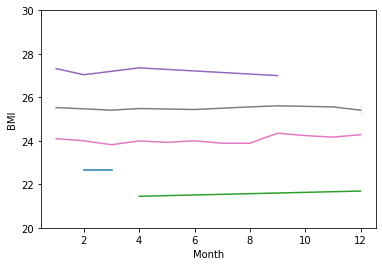

In [123]:
# How BMI of the participants have changed over a period of time (in months)

people_wt = list(weight['Id'].unique())

for person in people_wt:
    df = weight[weight['Id'] == person]
    sns.lineplot(x='Month', y = 'BMI', data = df)
    plt.ylim([20,30])

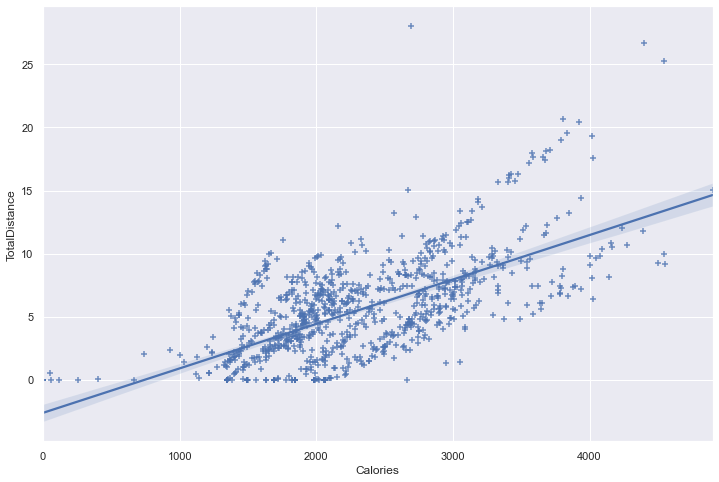

<Figure size 864x576 with 0 Axes>

In [130]:
# Comparison between total distance travelled and calories burnt

sns.set_theme(color_codes = True)
x = activities['Calories']
y = activities['TotalDistance']
plt.figure(figsize = (12, 8))
sns.regplot(x = x, y=y, data=activities, marker = "+")
plt.title("Calories burnt vs. Total distance travelled")
plt.show()

In [142]:
activities.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Weekday
0,1503960366,2016-12-04,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Sunday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


In [145]:
# Adding a column called weekday

def weekday_name(x):
    daynames = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    return daynames[x]

activities["Weekday"] = activities["ActivityDate"].map(lambda x: x.weekday()).map(lambda x: weekday_name(x))

In [161]:
steps_by_weekday = activities.groupby(['Weekday'])['TotalSteps'].mean()
steps_by_weekday = steps_by_weekday[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
steps_by_weekday

Weekday
Monday       7164.276786
Tuesday      7359.539474
Wednesday    7837.609756
Thursday     8059.753968
Friday       7293.843137
Saturday     8326.040541
Sunday       7387.460317
Name: TotalSteps, dtype: float64

Text(0.5, 1.0, 'Steps taken by weekday')

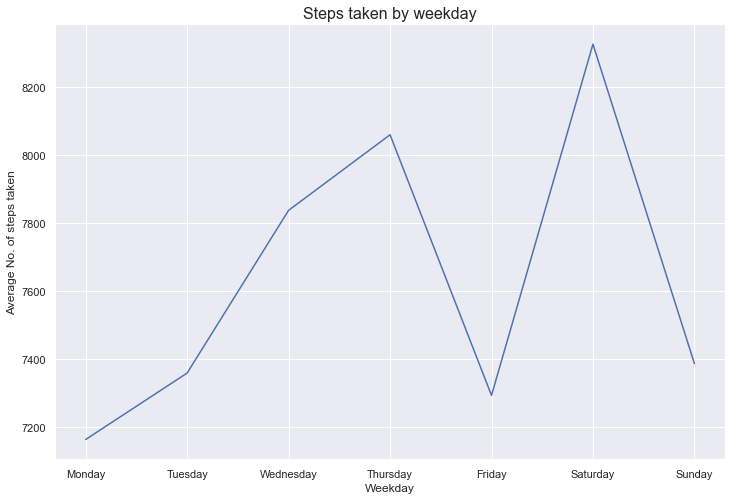

In [162]:

plt.figure(figsize = (12, 8))
sns.lineplot(x = steps_by_weekday.index, y = steps_by_weekday.values, data = steps_by_weekday)
plt.ylabel("Average No. of steps taken")
plt.title("Steps taken by weekday", fontsize = 16)

### What the data says?
* Participants walked the highest number of steps on Saturday while the least number of<br> 
  steps were walked on Monday followed by Friday, Tuesday and Sunday.<br>

### How can we use this data?
* We can add a feature in the Bellabeat app that notifies the users to walk more on the less active <br>
  days in advance while also quoting the highest number of steps they took on a day (mostly Saturday) **to motivate them**.

Text(0.5, 1.0, 'No. of times users logged in app across the week')

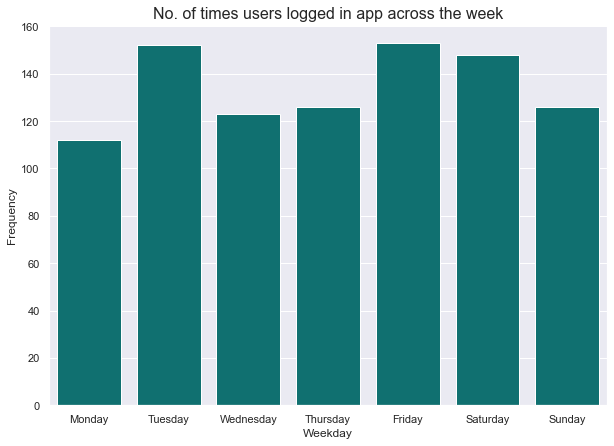

In [182]:
# Finding the No. of times users logged in app across the week

num_weekday = activities.groupby(["Weekday"])["Weekday"].count()
num_weekday = num_weekday[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

plt.figure(figsize = (10, 7))
sns.barplot(x =num_weekday.index, y = num_weekday.values, color = 'teal')
plt.ylabel("Frequency")
plt.title("No. of times users logged in app across the week", fontsize = 16)

* People use the fitness app, least on Monday and mid-week.
* Providing extra notifications on these days may motivate the users to be active.

In [183]:
activities.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Weekday
0,1503960366,2016-12-04,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Sunday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


In [188]:
activemins = activities.groupby(["Weekday"])[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].sum()
activemins = activemins.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
activemins

,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
Weekday,,,,
Monday,2395,1343,19704,107250
Tuesday,3083,2206,28147,151285
Wednesday,2831,1779,23498,121953
Thursday,2765,1713,25182,127721
Friday,2862,2049,30281,152079
Saturday,3353,2256,30756,142614
Sunday,2606,1405,23676,128836


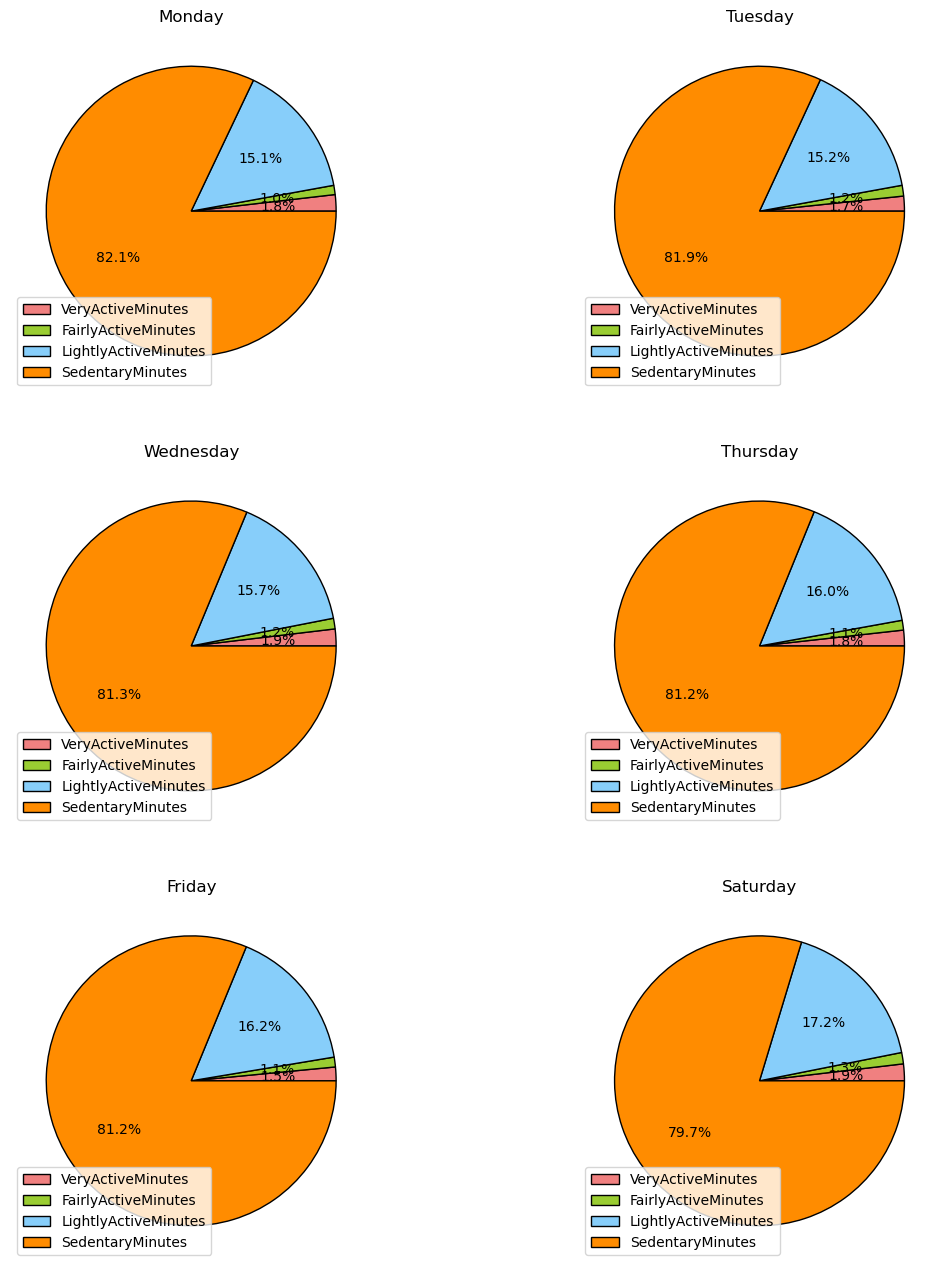

In [240]:
fig, axes = plt.subplots(3,2, figsize = (14, 16))

for i, (idx, row) in enumerate(activemins[:-1].iterrows()):
    
    ax = axes[i//2, i%2]
    colors = ["lightcoral", "yellowgreen", "lightskyblue", "darkorange"]
    explode = [0, 0, 0, 0.1]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, colors = colors, autopct = "%1.1f%%", wedgeprops = {"edgecolor":"black"})
    ax.set_title(idx)
    ax.legend(row.index)
    
fig.subplots_adjust(wspace = 0.1)

* Above is a breakdown of how much activity do people do by percentage time <br>of the day
  throughout the week.
  <br><br>
* Saturday has the least sedentary time while Monday has the most sendentary time.
<br><br>
* Similarly Saturday has the highest fairly active minutes (people <br>spending the time to roam around)
  while Monday has the least.

In [243]:
activities["Total_hours"] = (activities["VeryActiveMinutes"] + activities["FairlyActiveMinutes"] + 
activities["LightlyActiveMinutes"] + activities["SedentaryMinutes"]) / 60

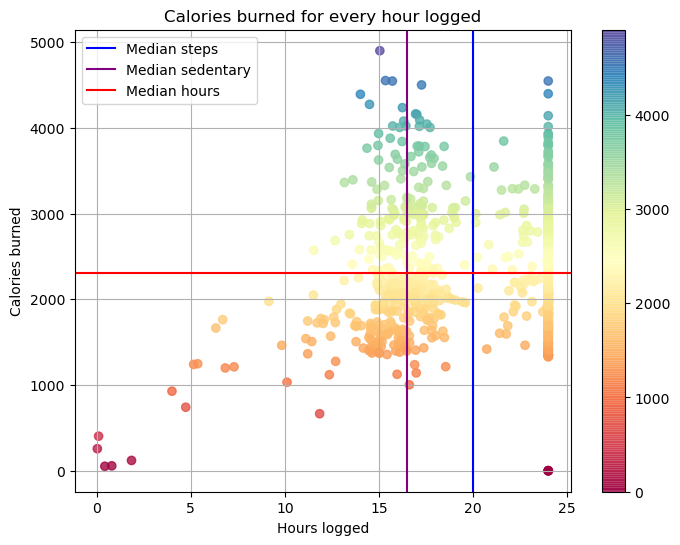

In [247]:
plt.style.use("default")
plt.figure(figsize=(8,6)) # Specify size of the chart
plt.scatter(activities.Total_hours, activities.Calories, 
            alpha = 0.8, c = activities.Calories, 
            cmap = "Spectral")

# adding annotations and visuals
median_calories = 2303
median_hours = 20
median_sedentary = 991 / 60

plt.colorbar(orientation = "vertical")
plt.axvline(median_hours, color = "Blue", label = "Median steps")
plt.axvline(median_sedentary, color = "Purple", label = "Median sedentary")
plt.axhline(median_calories, color = "Red", label = "Median hours")
plt.xlabel("Hours logged")
plt.ylabel("Calories burned")
plt.title("Calories burned for every hour logged")
plt.legend()
plt.grid(True)
plt.show()

**From the scatter plot, we discovered that:**

It is a positive correlation.

We observed that intensity of calories burned increase when users are at the range of > 0 to 15,000 steps with calories burn rate cooling down from 15,000 steps onwards.

**Noted a few outliers:**

Zero steps with zero to minimal calories burned.
1 observation of > 35,000 steps with < 3,000 calories burned.
Deduced that outliers could be due to natural variation of data, change in user's usage or errors in data collection (ie. miscalculations, data contamination or human error). 

## Summarizing our Analysis 

In the final step, we will be delivering our insights and providing recommendations based on our analysis.

Here, we revisit our business questions and share with you our high-level business recommendations.

1. **What are the trends identified?**

Majority of the time (~ 80%) the users are using the FitBit app while doing sedentary activities and not for tracking their health habits.

Users prefer to track their activities during weekdays as compared to weekends - perhaps because they spend more time outside on weekdays and stay in on weekends.

* Almost 40% women do not burn enough calories everyday (less than 2000 calories)
* Almost 68% women do not lead an active lifestyle (10000 steps each day is considered an active lifestyle. <br>
  This is recommended by the Center of Disease Control and prevention (CDC) )
* Almost 32% women lead a sedentary lifestyle (less than 5000 steps each day)

2. **How could these trends apply to Bellabeat customers?**

The company should focus on developing and including features for their app that helps their users to stay motivated
to remain fit and active when they are the lowest on motivation.<br>
This can be done using a reward points based system, where a person gets rewarded for burning more calories, remaining consistent in their workout routine for the longest number of days etc.


3. **How could these trends help influence Bellabeat marketing strategy?**

Bellabeat marketing team can encourage users by educating and equipping them with knowledge about their own fitness and routine activity habits, fitness benefits, suggest different types of exercise (ie. simple 10 minutes exercise on weekday, especially Monday and a more intense exercise on weekends). The app can make the users aware of their calory intake and burnt rate information to be vigilant about their habits.